In [22]:
import os
import glob
from astropy.table import Table, hstack, vstack

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
import os
import sys
import glob
import pickle

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib.pyplot as plt
params = {
    'font.family'        : 'lmodern',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

from matplotlib.colors import ListedColormap
parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]

# Package to save multiple PDF pages in one PDF
from matplotlib.backends.backend_pdf import PdfPages

# Change Work directory (if Sven's computer)
try:
    localFilePath = '/shared-storage/buder/svn-repos/trunk/GALAH/CANNON/dr5.2/Cannon3.0.1/fits_files/'
    os.chdir(localFilePath)
    print('Current working directory: '+os.getcwd())
except:
    print('Could not change Path to '+localFilePath)
    
fits_files = glob.glob('Cannon3.0.1_SMEmasks_*.fits')

Current working directory: /shared-storage/buder/svn-repos/trunk/GALAH/CANNON/dr5.2/Cannon3.0.1/fits_files


In [28]:
fits_files.sort()
fits_files

t1 = Table.read(fits_files[0], format='fits')
for each_fits in fits_files[1:]:
    t2 = Table.read(each_fits, format='fits')
    t1 = vstack([t1, t2])
    print(t1)

t1.write('sobject_iraf_cannon3.0.1.fits',overwrite=True)

  V_abund_cannon  ld_Si_abund_cannon ...   e_Logg_cannon   ld_Ba_abund_cannon
----------------- ------------------ ... ----------------- ------------------
   -0.14979146473                0.0 ...  0.00262872563906                0.0
   0.330342031277                0.0 ...  0.00176435782498                0.0
   0.447818117756                0.0 ... 0.000256698946153                0.0
   -0.33210866091                0.0 ... 0.000399130825245                0.0
   0.418967786447                0.0 ... 6.64138634135e-05                0.0
   0.420489446008                0.0 ...  0.00146326068514                0.0
   0.309657856074                0.0 ...   0.0055580612244                0.0
   0.495454756147                0.0 ...  0.00112046395701                0.0
   0.584018977195                0.0 ...  0.00119117906523                0.0
   0.322070677483                0.0 ... 7.19991377659e-05                0.0
              ...                ... ...               ...      

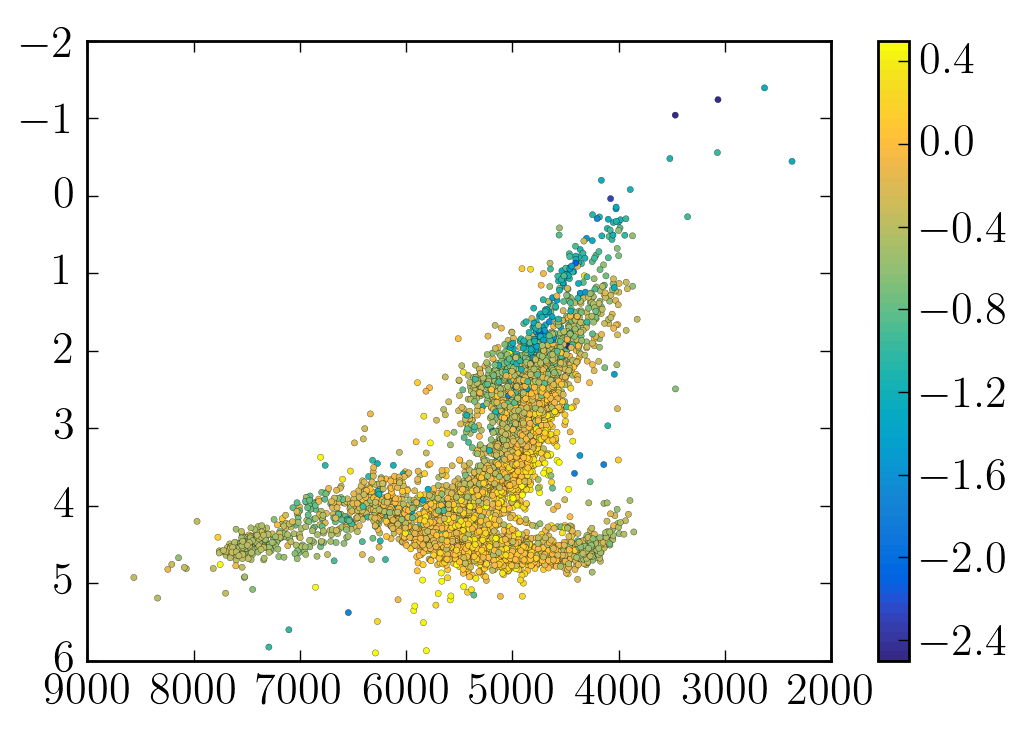

In [27]:
s1 = plt.scatter(t1['Teff_cannon'],t1['Logg_cannon'],c=t1['Feh_cannon'],cmap=parula,s=5,lw=0.1, vmin=-2.5, vmax=0.5)
plt.xlim(9000,2000)
plt.ylim(6,-2)
c = plt.colorbar(s1)